# Classifying Data with Logistic Regression in Python

## Project Objective
The purpose of this project is to predict if a borrower will default on their loan. The predictors are annual income and credit score, and the response is loan default.

### Data Source
Loan Approval Classification Dataset source information
Synthetic Data for binary classification on Loan Approval

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download

Observations about this dataset ccited from the source in GitHub
*"This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances."*

The dataset contains 45,000 records and 14 fields

## Importing the Python Packages

import the required Python packages.

In [1]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
from scipy.stats import norm 
from scipy.stats import sem # Standard error of mean
import matplotlib.pyplot as plt # used for visualisations
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') # error handling
import seaborn as sns # a more user-friendly library used for visualisations
sns.set_theme(rc={'figure.figsize':(8,6)})
import statistics

## 1. Collect the Data

Import the data into a dataframe called `dfR`.

In [2]:
dfR = pd.read_csv("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Portfolio - Data Science Professional Practice/Loans/loan_data.csv")

To verify that the import worked as expected, preview the data using the `head()` method.

## 2. Tidy up the data set

Check the data set for any missing data

In [3]:
dfR.isnull().sum(axis=0)

person_age                        0
person_gender                     0
person_income                     0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Create dummy variable columns for the 'previous_loan_defaults_on_file' and 'person_gender' columns and assign them to variables. Add default column to the data frame and rename it to 'loan_default', similarly add male column and rename it 'sex' where 1 = male and 0 = female. Remove unnecessary column 'previous_loan_defaults_on_file' and 'person_gender' from the data frame.

In [4]:
default_data = pd.get_dummies(dfR['previous_loan_defaults_on_file'], drop_first = True)
gender_data = pd.get_dummies(dfR['person_gender'], drop_first = True)
dfR = pd.concat([dfR, default_data,gender_data], axis = 1)
dfR.rename(columns={'Yes': 'previous_defaults','male': 'sex'}, inplace=True)
dfR.drop(['previous_loan_defaults_on_file','person_gender'], axis = 1, inplace = True)

In [5]:
dfR.head()

,person_age,person_income,credit_score,loan_status,previous_defaults,sex
0,144,7200766,850,0,0,0
1,144,300616,789,0,0,1
2,144,241424,807,0,0,1
3,123,97140,805,0,1,0
4,123,94723,714,0,1,1


The dataset has six columns. Five - `person_age`,  `person_income`, `credit_score`,  `previous_default` and  `sex` - are the predictors (or independent variables), while - `loan_status` - is the response (or dependent variable).

The objective is to train a logistic regression model to predict whether a new borrower will get a loan approved based on their income, age, credit score, sex and previous loan record. 
  
In `loan_defaults`  **0** represents <span style="color:green">**loan repaid**</span> and **1** represents <span style="color:red">**loan default**.</span>  

In `sex`  **1** represents <span style="color:green">**male**</span> and **0** represents <span style="color:red">**female**.</span>

## 2. Explore the Data

A concise summary data structure by calling the `info()` method.

In [6]:
dfR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   person_age         45000 non-null  int64
 1   person_income      45000 non-null  int64
 2   credit_score       45000 non-null  int64
 3   loan_status        45000 non-null  int64
 4   previous_defaults  45000 non-null  uint8
 5   sex                45000 non-null  uint8
dtypes: int64(4), uint8(2)
memory usage: 1.5 MB


There are 45,000 instances (or rows) in the dataset.

The dataset consists of 5 features (or columns). 

Summary statistics for the numeric features in the data by calling the describe() method.

In [7]:
dfR.describe()

,person_age,person_income,credit_score,loan_status,previous_defaults,sex
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,632.608756,0.222222,0.507956,0.552022
std,6.045108,8.042250e+04,50.435865,0.415744,0.499942,0.497292
min,20.000000,8.000000e+03,390.000000,0.000000,0.000000,0.000000
25%,24.000000,4.720400e+04,601.000000,0.000000,0.000000,0.000000
50%,26.000000,6.704800e+04,640.000000,0.000000,1.000000,1.000000
75%,30.000000,9.578925e+04,670.000000,0.000000,1.000000,1.000000
max,144.000000,7.200766e+06,850.000000,1.000000,1.000000,1.000000


From the statistics, we can see the average, standard deviation, minimum, and maximum values for both the 	person_income, credit_score and person_age variables.

<span style="color:red">**Note 1:**</span>  the minimum and maximum `person_income` values are <span style="color:blue">*£8,000*</span>  and <span style="color:blue">*£7,200,766*</span> , respectively, this is a wide spread.  
<span style="color:red">**Note 2:**</span> the maximum `person_age` is <span style="color:red">**144 years**</span>  which seems to be an error.  

### 2.1. Bar chart with count of loan status

[Text(0, 0, '35000'), Text(0, 0, '10000')]

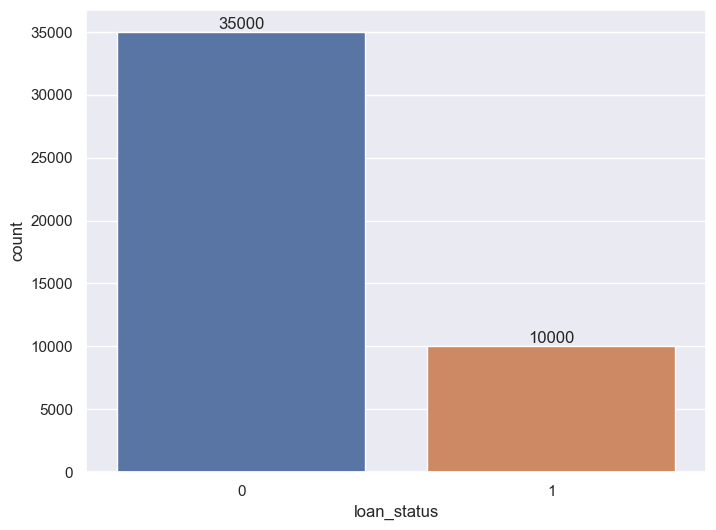

In [8]:
ax = sns.countplot(x ='loan_status', data = dfR);
defaults = dfR['loan_status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=defaults)

### 2.2. Scatterplot: person_income : loan_status
There is a large spread of values between maximum and minimum  `person_income` values. A scatterplot will show the spread of the data.  
  
Scatterplot between the <span style="color:blue"> predictor (independent variable) –  `person_income`  </span>and the <span style="color:red"> response (dependent variable) –  `loan_status`.</span>  

<AxesSubplot:xlabel='person_income', ylabel='loan_status'>

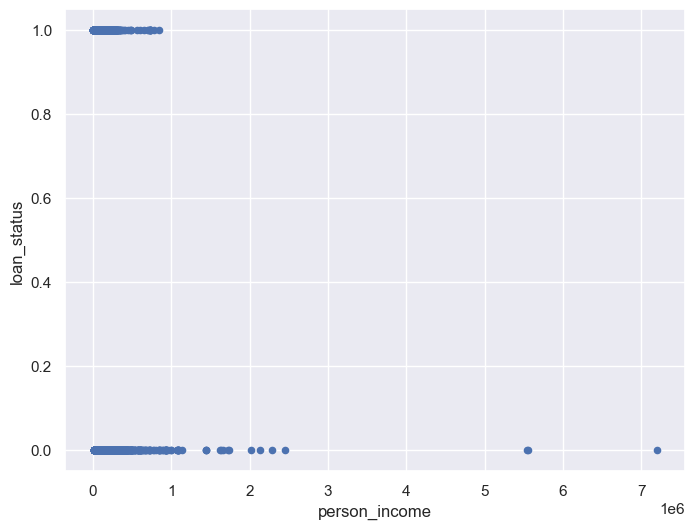

In [9]:
%matplotlib inline
dfR.plot(kind = 'scatter', x = 'person_income', y = 'loan_status')

<span style="color:red">**Note:** There are three large outliers</span> in the `income` data one value is the maximum <span style="color:blue">*£7,200,766*</span> and the other two <span style="color:blue">*£5,556,399 and £5,545,545* </span>. These three outliers are removed from the dataset.

### 2.3. Scatterplot: person_age : loan_status
There is a large maximum age. A scatterplot will show the spread of the data.

Scatterplot between the predictor (independent variable) – person_age and the response (dependent variable) – loan_status.

<AxesSubplot:xlabel='person_age', ylabel='loan_status'>

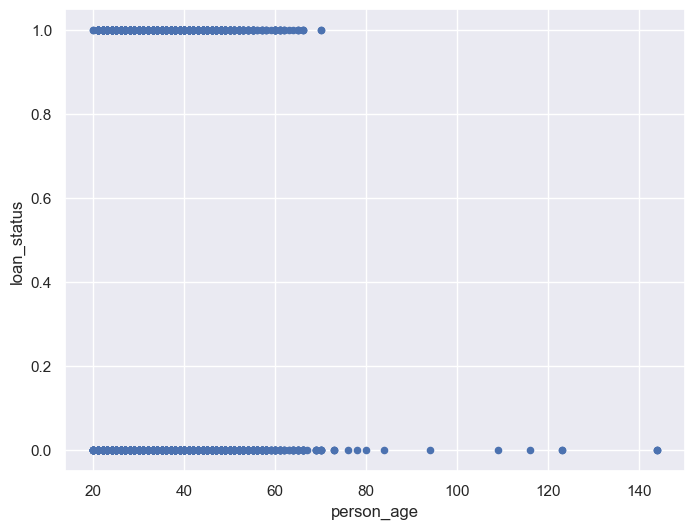

In [10]:
%matplotlib inline
dfR.plot(kind = 'scatter', x = 'person_age', y = 'loan_status')

<span style="color:red">**Note:** There are 7 large outliers</span> in the `person_age` data three are the maximum <span style="color:blue">*144*</span>, two <span style="color:blue">*123, one 116 and 109* </span>. These 7 outliers are removed from the dataset.

### 2.3. Remove outliers on income

Removed the three outliers where annual income exceeds £5 million
Remmoved the 7 person_age outliers where person_age exeeds 100 years

In [11]:
df = dfR[dfR['person_income'] < 5000000]
df = df[df['person_age'] < 100]
df.shape

(44993, 6)

#### 2.4.1 Scatterplot: person_income : loan_status (outliers removed)

Scatterplot between the <span style="color:blue"> predictor (independent variable) –  `person_income`  </span>and the <span style="color:red"> response (dependent variable) –  `loan_status` .</span>  

<AxesSubplot:xlabel='person_income', ylabel='loan_status'>

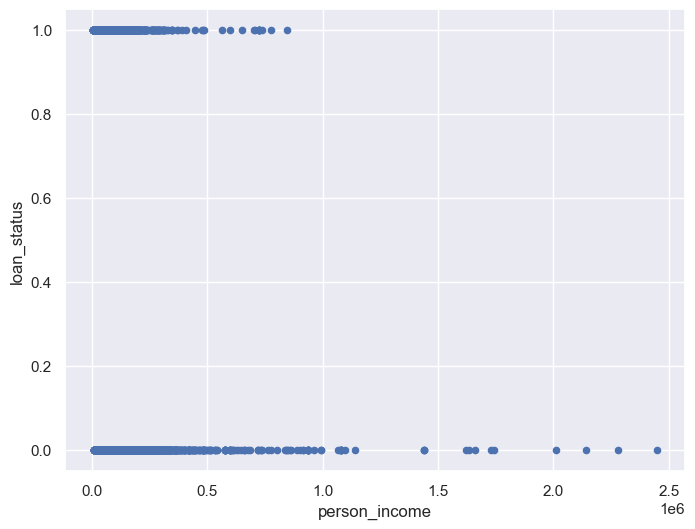

In [12]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'person_income', y = 'loan_status')

#### 2.4.2 Scatterplot: person_age : loan_status (outliers removed)
Scatterplot between the <span style="color:blue"> predictor (independent variable) –  `person_age`  </span>and the <span style="color:red"> response (dependent variable) –  `loan_status` .</span>  

<AxesSubplot:xlabel='person_age', ylabel='loan_status'>

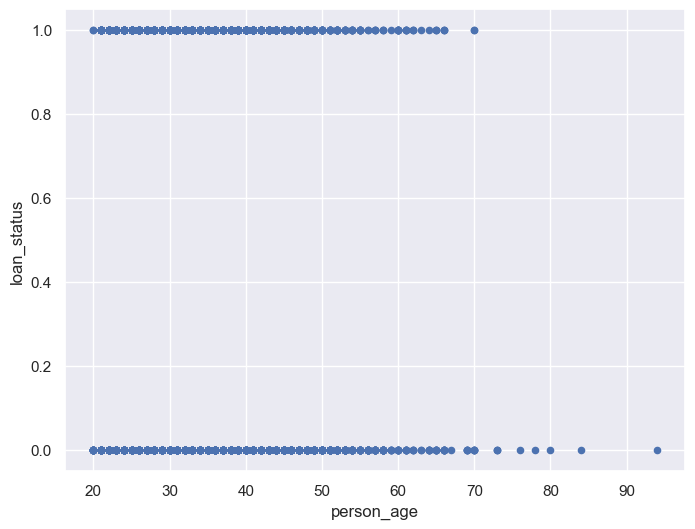

In [13]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'person_age', y = 'loan_status')

In [14]:
df.describe()

,person_age,person_income,credit_score,loan_status,previous_defaults,sex
count,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000
mean,27.748428,7.990845e+04,632.585713,0.222257,0.507990,0.551997
std,5.909737,6.332213e+04,50.402411,0.415767,0.499942,0.497294
min,20.000000,8.000000e+03,390.000000,0.000000,0.000000,0.000000
25%,24.000000,4.719500e+04,601.000000,0.000000,0.000000,0.000000
50%,26.000000,6.704600e+04,640.000000,0.000000,1.000000,1.000000
75%,30.000000,9.577800e+04,670.000000,0.000000,1.000000,1.000000
max,94.000000,2.448661e+06,784.000000,1.000000,1.000000,1.000000


#### 2.4.3 The Prevalence of each classification category

[Text(0, 0, '34993'), Text(0, 0, '10000')]

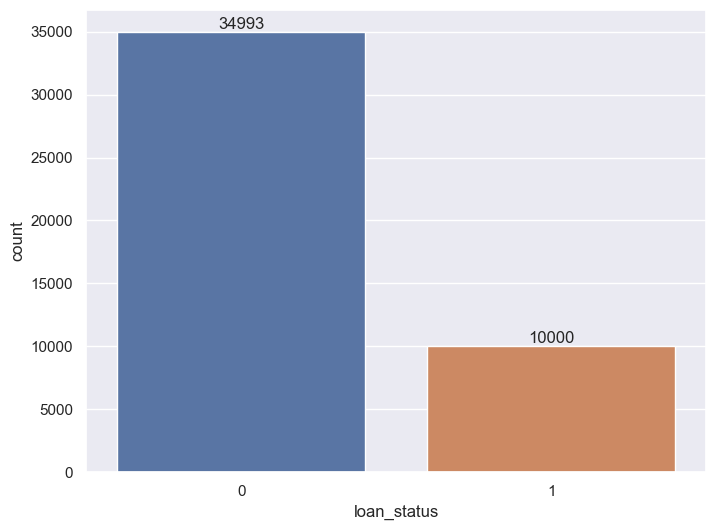

In [15]:
ax1 = sns.countplot(x = 'loan_status', data = df);
status = df['loan_status'].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0], labels=status)

 There are many more incidences of approved loans than not approved.
   
 #### 2.4.4 Approval rates between genders
 
 In `sex`  **1** represents <span style="color:green">**male**</span> and **0** represents <span style="color:red">**female**.</span>

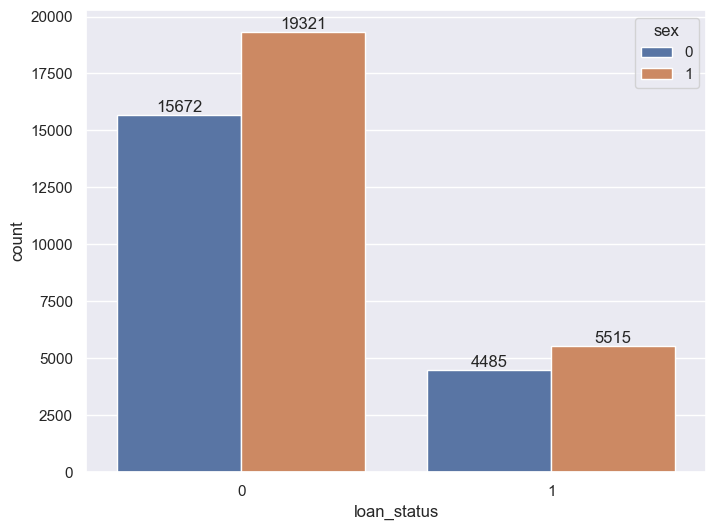

In [16]:
ax2 = sns.countplot(x='loan_status', hue = 'sex', data = df);
gender = df['loan_status'].value_counts(ascending=False).values
for container in ax2.containers:
    ax2.bar_label(container)

 There are loans approved for men than women more incidences of approved loans than not approved.

#### 2.4.5. Dispersion by age and gender 

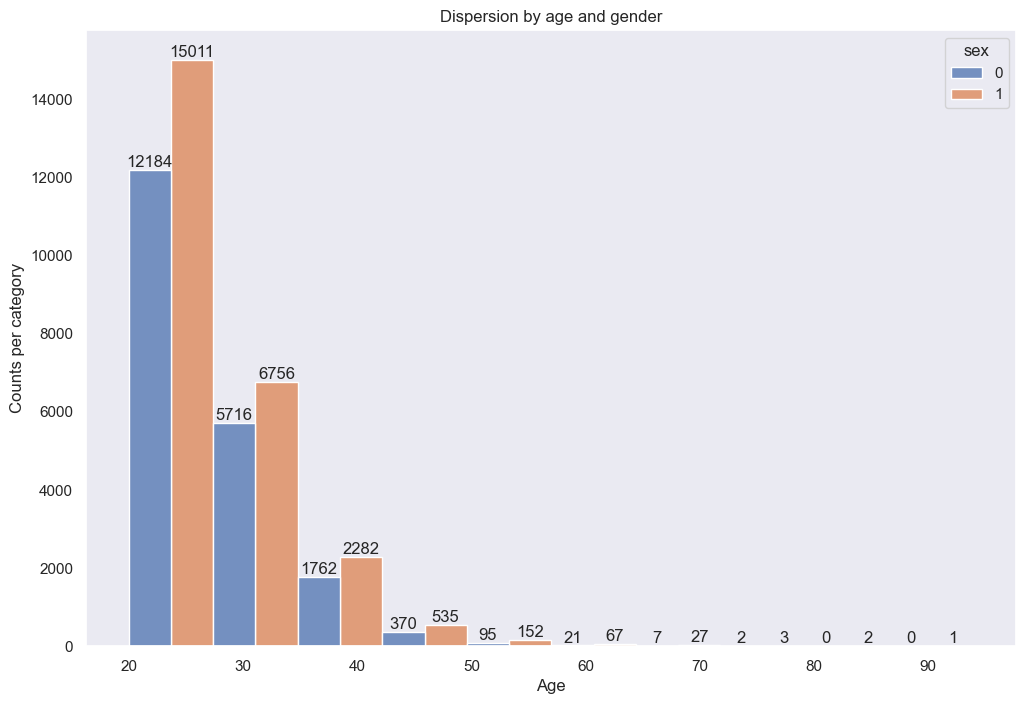

In [17]:
sns.set(rc={"figure.figsize":(12, 8)}) #width=12, height=8
ax3 = sns.histplot(data = df, x= 'person_age',  hue = 'sex',multiple="dodge", bins = 10);
gender = df['loan_status'].value_counts(ascending=False).values
for container in ax3.containers:
    ax3.bar_label(container)
plt.title('Dispersion by age and gender')
plt.xlabel('Age')
plt.ylabel('Counts per category')
plt.grid(False)

#### 2.4.5. Credit score distribution

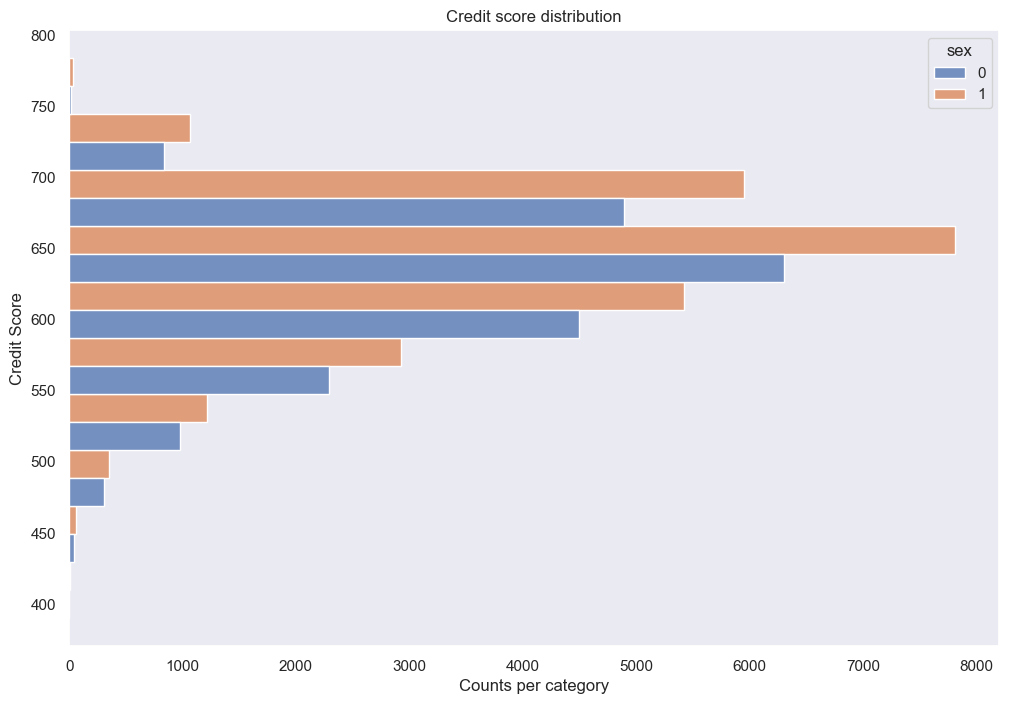

In [18]:
cs= sns.histplot(data = df, y = 'credit_score', hue = 'sex', multiple="dodge", bins = 10)
plt.title('Credit score distribution')
plt.xlabel('Counts per category')
plt.ylabel('Credit Score')
plt.grid(False)

## 3. Prepare the Data for the data model

#### Stage 1: separate the dependent variable
Separate the dependent variable 'y' from the independent variables. 

Create a pandas series `y` for the dependent variable.

In [19]:
y = df['loan_status'] #in variable 'y' save the column ['loan_status'] = response/dependent variable (categorial)
y.head()

7     0
8     0
9     0
10    0
11    0
Name: loan_status, dtype: int64

Then create a pandas DataFrame called X for the independent variables.

In [20]:
x = df[['person_age', 'person_income','credit_score','previous_defaults']] 
# Notice the use of TWO sets of square brackets - because this is a dataframe, x is a dataframe and y is a series
x.head()

,person_age,person_income,credit_score,previous_defaults
7,94,29738,773,0
8,84,114705,784,1
9,80,77894,673,0
10,78,58463,754,0
11,76,90934,737,0


#### Stage 2: split the data into training and test sets
The  objective of this step is to split the data into training and test sets. The training set will be used to train the model, while the test set will be used to evaluate the model.  

Next, import the `train_test_split()` function from the `sklearn.model_selection` subpackage. 

In [21]:
from sklearn.model_selection import train_test_split

#### Stage 3: Setting up the train and test data

Using the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train` and `y_test`.

Note that within the `train_test_split()` function, set:

* `train_size` to `0.7`. This means we want $70\%$ of the original data to be assigned to the training data while $30\%$ is assigned to the test data. 

* Note that the default is 0.8 so that willl split the train at 80% and test at 20%

* Stratified random sampling is used because there are fewer *No* defaults in the categorical data `loan_status`. This ensures  that the sampling refects the distribution in the categories in the test and train data sets. 

* `stratify` as `y`. split the data using a stratified random sampling approach based on the values of `y`(which is the `loan_status`data. 

* `random_state` to `123`, ensures same results every time the data is split. 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7,stratify = y, random_state = 123)

After the data is split, the newly created `X_train` and `X_test` data sets hold the independent variables for the training and test sets, respectively. While the `y_train` and `y_test` data sets hold the dependent variable for the training and test sets respectively.

In [23]:
x_train.shape # Note that you do not use .shape() but just .shape

(31495, 4)

The result is a tuple that holds the number of rows and columns in the X_train dataframe.  31,495 out of the  44,993 instances in the loans data were assigned to the training set.

In [24]:
x_test.shape

(13498, 4)

The result tells us that  13,498 out of the  44,993 instances in the loans data were assigned to the test set.

## 4. Training the Logistic Regression Model

Use the `LogisticRegression` class from the `sklearn.linear_model` subpackage to train the model.

In [25]:
from sklearn.linear_model import LogisticRegression

Create the model as a LogisticRegression object

In [26]:
model = LogisticRegression()

Train the model using the fit method on the model by passing in the x_train and y_train variables.  

Note: predict_proba(x)
Probability estimates. The returned estimates for all classes are ordered by the label of classes. Returns the log-probability of the sample for each class in the model.


In [27]:
model.fit(x_train, y_train).predict_proba(x_test)

array([[0.7268319 , 0.2731681 ],
       [0.87013542, 0.12986458],
       [0.8750702 , 0.1249298 ],
       ...,
       [0.79967228, 0.20032772],
       [0.82481825, 0.17518175],
       [0.99656665, 0.00343335]])

The model is trained and is ready to make predictions.

## 5. Making Predictions With Our Logistic Regression Model
Make a set of predictions with the test data using the logistic regression model and store the predictions in a variable called predictions.



In [28]:
predictions = model.predict(x_test)

There are $13,498$ instances (or rows) in the test set. To predict labels for the test instances, we pass the independent variables of the test set (`X_test`) to the `predict()` method of the model.

## 6. Measuring the Performance of a Logistic Regression Machine Learning Model


*scikit-learn* has an excellent built-in module called classification_report that simplifies measuring the performance of a classification model.


In [29]:
from sklearn.metrics import classification_report

Use the classification report module to calculate the performance metrics for the logistic regression model

In [30]:
classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10498
           1       0.50      0.17      0.26      3000

    accuracy                           0.78     13498
   macro avg       0.65      0.56      0.56     13498
weighted avg       0.73      0.78      0.73     13498



In [31]:
model.score(x_test, y_test)

0.7775966809897763

To evaluate how accurate our model is, pass the test data (X_test and y_test) to the score() method of the model.  
  
The output 0.7776 shows that the model is able to correctly predict 8 out of ten (or 78%) of the labels in the test set

### 6.1. Confusion Matrix

The accuracy of a model only gives us a one-dimensional perspective of performance. To get a broader perspective, generate a confusion (or error) matrix of the model's performance. 
  
The confusion matrix clarifies the model output which ccan now be evaluated against the test data. Next we need to interpret the model and use the model coefficients.
  
Import the `confusion_matrix` function from the `sklearn.metrics` subpackage.

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Pass the dependent variable from the test set (which are the actual labels) and the model's predicted labels to the `confusion_matrix()` function.

1) The first argument to the confusion matrix is y_test which are the actual labels.
2) The second argument to the confusion matrix is model.predict(x_test) whih are the prediccted labels 
3) The output is an array the array that we get is a 2 x 2 array that shows how many instances the model predicted correctly.
4) The confusion matrix is shown in the image below which shows for the first tuple (row 1) 3 true negatives 1 false positive.
5) For the seond tuple (row 2) 0 false negatives 5 true positives.

In [33]:
cm = confusion_matrix(y_test,predictions)
cm

array([[9976,  522],
       [2480,  520]], dtype=int64)

The result is a $ 2\times 2$ array that shows how many instances the model predicted correctly or incorrectly as either `Yes` or `No`. The confusion matrix is illustrated as follows:

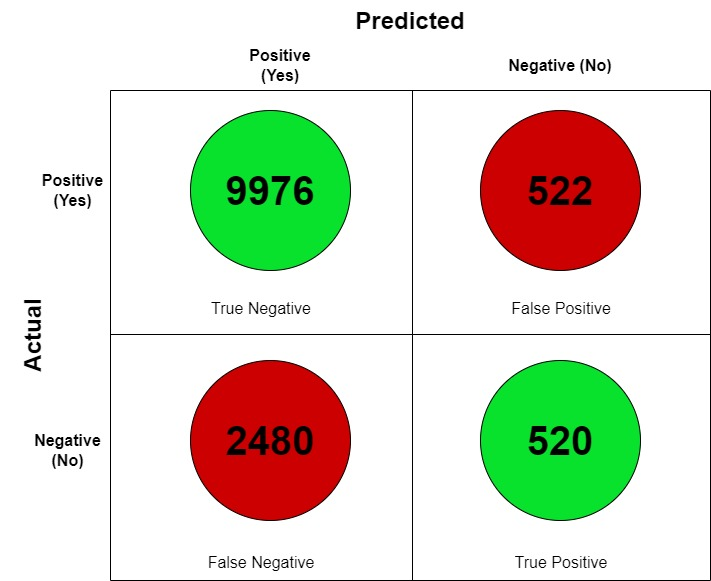

The first row of the matrix shows that of the $10,498$ instances, the model correctly predicted $9,776$ of them as `Yes` but incorrectly predicted $522$ as `Yes`when they should have been `No`. The second row of the matrix shows that of the $3,000$ instances the model correctly predicted $520$ as `No` but incorrectly predicted 2,480 false negatives.  

Correct predictions:   9,776 + 520 = 10,296 <span style="color:green">**(77% of predictions correct)**.</span>  

Incorrect predictions: 2,480 + 522 =  3,002 <span style="color:red">**(23% of predictions incorrect)**.</span>  

Total Predictions:                 = 13,298

### 6.2. Accuracy
Accuracy measures how often the model is correct.  

Accuracy is 78%

In [34]:
Accuracy = metrics.accuracy_score(y_test,predictions)
Accuracy

0.7775966809897763

### 6.3. Precision
Of the positives predicted, what percentage is truly positive  

Precision is 50%

In [35]:
Precision = metrics.precision_score(y_test,predictions)
Precision

0.4990403071017274

### 6.4. Sensitivity (Recall)
Of all the positive instanes, what percentage are predicted positive?
  
Sensitivity (Recall) measures how the model is at predicting positives.
  
True Positive / (True Positive + False Negative)
  
Sensitivity is 17%

In [36]:
Sensitivity = metrics.recall_score(y_test,predictions)
Sensitivity

0.17333333333333334

### 6.5 Specificity
Measures how good the model is at prediciting negative results (essentially the opposite of recall)

True Negative / (True Negative + False Positive)

Specificity is 95%

In [37]:
Specificity = metrics.recall_score(y_test,predictions, pos_label=0)
Specificity

0.9502762430939227

### 6.6. F-score
F-score is the "harmonic mean" of precision and sensitivity.  

Considers both false positive and false negative cases  
  
2 * ((Precision * Sensitivity) / (Precision + Sensitivity))  

This score does not take into consideration the True Negative values.

F1_score = 26%

In [38]:
F1_score = metrics.f1_score(y_test,predictions)
F1_score

0.2572983671449777

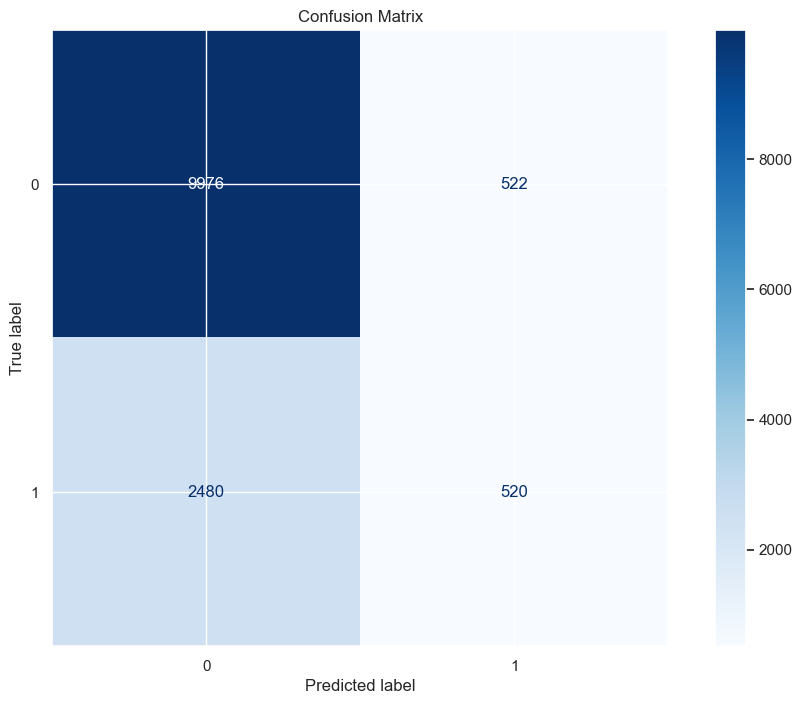

In [39]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### 6.7. Receiver Operating Characteristic (ROC)

Source 1: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Soure 2: https://www.statology.org/plot-roc-curve-python/




In [40]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(13498, 1)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

<function matplotlib.pyplot.show(close=None, block=None)>

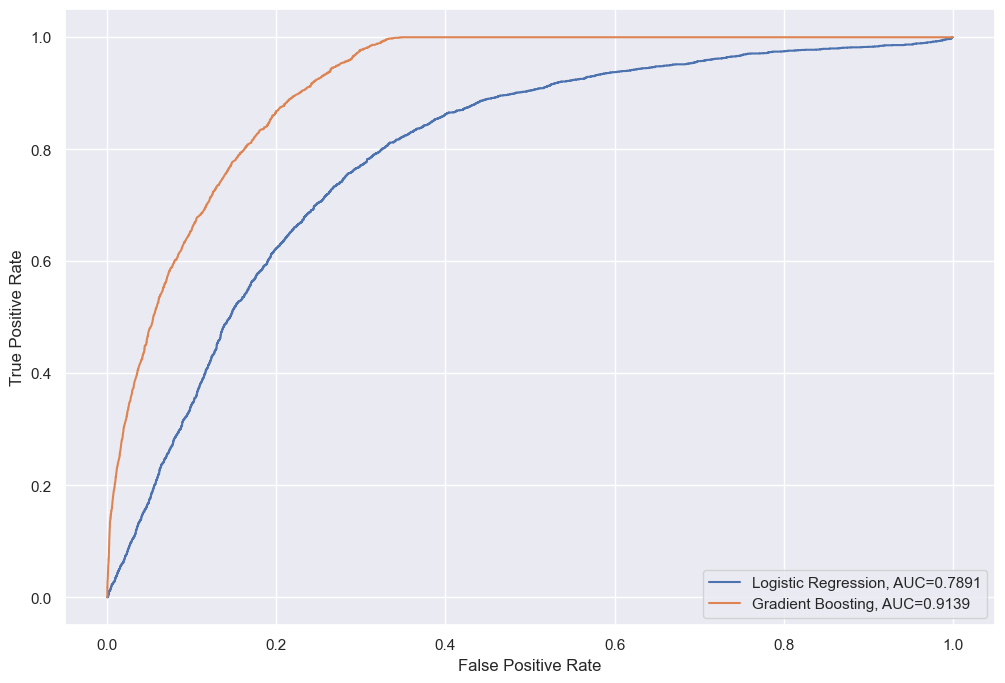

In [42]:
#define metrics
y_pred_proba = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)


#create ROC curve
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0)
plt.show

### 7.1. Updating the model metrics post gradient boosting
Update the set of predictions with the test data using the gradient boosted logistic regression model and store the new predictions in a variable called predictions.  

<span style="color:red">**Note:** this step and all subsequent steps will contain the outputs from the gradient boosted logistic regression model. </span>

### 7.2. Updating predictions

In [43]:
predictions = model.predict(x_test)

### 7.3. Update the classification report

Update the classification report module to update the performance metrics for the gradient boosted model

In [44]:
classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     10498
           1       0.70      0.56      0.62      3000

    accuracy                           0.85     13498
   macro avg       0.79      0.75      0.76     13498
weighted avg       0.84      0.85      0.84     13498



### 7.4. Update the test score

To evaluate how accurate the gradient boosted  model is, pass the updated test data (X_test and y_test) to the score() method of the model.  

In [45]:
model.score(x_test, y_test)

0.8492369239887391

The new gradient boosted score is 0.85 (the previous model score was 0.78) thus an improvement.  

The model is able to correctly predict nearly 9 out of ten (or 85%) of the labels in the test set

### 7.5. Updated Confusion Matrix

In [46]:
cm = confusion_matrix(y_test,predictions)
cm

array([[9778,  720],
       [1315, 1685]], dtype=int64)

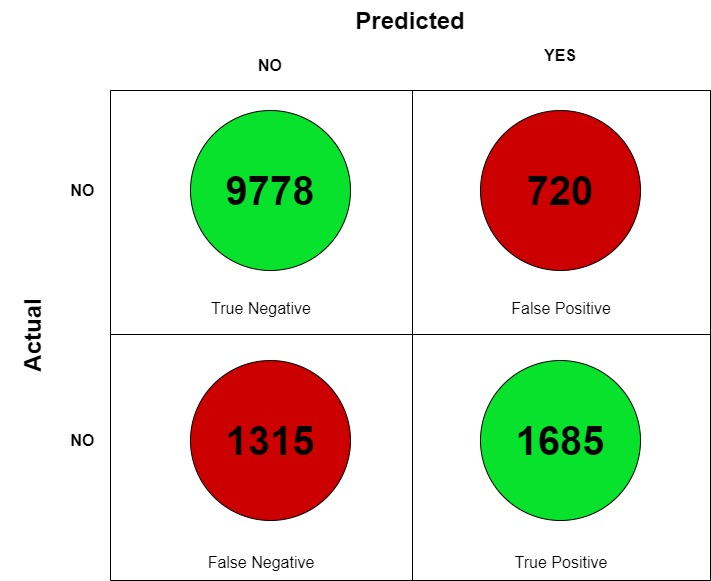

The first row of the matrix shows that of the $10,498$ instances, the model correctly predicted $9,778$ of them as `Yes` but incorrectly predicted $720$ as `Yes`when they should have been `No`. The second row of the matrix shows that of the $3,000$ instances the model correctly predicted $1,685$ as `No` but incorrectly predicted 1,315 false negatives.  

Correct predictions: 9,778 + 1,685 = 11,463 <span style="color:green">**(85% of predictions correct)**.</span>  

Incorrect predictions: 1,315 + 720 =  2,035 <span style="color:red">**(15% of predictions incorrect)**.</span>  

Total Predictions:                 = 13,498

### 7.6. Accuracy
Accuracy measures how often the model is correct.  

Gradient booseted accuracy is now 85% compared to 78% of the original model <span style="color:green">**(7% improvement)**</span> 

In [47]:
Accuracy = metrics.accuracy_score(y_test,predictions)
Accuracy

0.8492369239887391

### 7.7. Precision
Of the positives predicted, what percentage is truly positive  

Gradient booseted Precision is now 70% compared to 50% of the original model <span style="color:green">**(20% improvement)**</span> 

In [48]:
Precision = metrics.precision_score(y_test,predictions)
Precision

0.7006237006237006

### 7.8. Sensitivity (Recall)
Of all the positive instanes, what percentage are predicted positive.  
  
Sensitivity (Recall) measures how the model is at predicting positives. True Positive / (True Positive + False Negative). 
  
Gradient booseted Sensitivity is now 56% compared to 17% of the original model <span style="color:green">**(39% improvement)**</span>  

In [49]:
Sensitivity = metrics.recall_score(y_test,predictions)
Sensitivity

0.5616666666666666

### 7.9 Specificity
Measures how good the model is at prediciting negative results (essentially the opposite of recall) True Negative / (True Negative + False Positive).

  
Gradient booseted Specificity is now 93% compared to 95% of the original model <span style="color:red">**(-2% decrease)**</span> 

In [50]:
Specificity = metrics.recall_score(y_test,predictions, pos_label=0)
Specificity

0.9314155077157554

### 7.10. F-score
F-score is the "harmonic mean" of precision and sensitivity. Considers both false positive and false negative cases  
  
2 * ((Precision * Sensitivity) / (Precision + Sensitivity))  

This score does not take into consideration the True Negative values.

Gradient booseted F1_score is now 62% compared to 26% of the original model <span style="color:green">**(36% improvement)**</span> 

In [51]:
F1_score = metrics.f1_score(y_test,predictions)
F1_score

0.6234967622571693